# **🛒 FreshMart Revenue Optimization**

FreshMart, a leading U.S. grocery chain, is shifting focus from expanding store locations to maximizing Total Sales Revenue through its existing infrastructure. This project analyzes four months of sales data—including product-level sales, customer demographics, city attributes, and employee performance—to uncover key revenue drivers. The goal is to identify high-performing products, evaluate discount and geographic trends, segment customer behavior, and assess employee impact. Insights will guide smarter strategic decisions, improve profitability, and enhance overall retail efficiency.

# **Objective:**

In this project, we aim to analyze FreshMart’s retail sales data to:



*   **Maximize Total Sales Revenue:** Identify key drivers of revenue across products, customers, regions, and employees to uncover untapped growth opportunities.

*   **Understand Buying Behavior:** Analyze how customer segments respond to discounts, product classes, and pricing strategies.


*   **Optimize Product and Pricing Strategy:** Evaluate category performance, shelf life, and price tiers to improve profitability and inventory decisions.

*   **Empower Data-Driven Decisions:** Deliver actionable insights through a clean, interactive Tableau dashboard for smarter retail operations and strategic planning.






# **Business Impact**

This analysis helps FreshMart to:


*   **Boost Revenue from Existing Stores:** Identify and amplify the factors that contribute most to total sales revenue without opening new outlets.

*   **Enhance Strategic Decision-Making:** Use data-driven insights to refine pricing, discounting, and inventory strategies.


*  **Optimize Customer and Employee Performance:** Segment high-value customers and top-performing employees to replicate success across the network.

*   **Improve Operational Efficiency:** Streamline sales efforts by focusing on high-margin categories and underperforming locations for targeted improvements.


# **Dataset Information:**


*   **Dataset:** FreshMart Retail Sales Analytics
*   **Count of Rows:** 6,758,125 (in sales.csv)
*   **Count of Columns:** 9 (in sales.csv)
*   **Total CSV Files Used:** 7 (sales, products, customers, employees, cities, countries, categories)

The dataset includes the following files and key columns:
1.	**sales.csv:** SalesID, ProductID, CustomerID, EmployeeID, Quantity, Discount, SalesDate, TotalPrice, TransactionNumber. Captures each sale with quantity, pricing, and discount details.
2.	**products.csv:** ProductID, ProductName, Price, CategoryID, Class, IsAllergic, VitalityDays. Provides product attributes, pricing, classification, and shelf-life indicators.
3.	**categories.csv:** CategoryID, CategoryName. Maps products to their broader category (e.g., Beverages, Snacks, Dairy).
4.	**customers.csv:** CustomerID, FirstName, CityID, Address. Enables customer-based segmentation and geographic profiling.
5.	**employees.csv:** EmployeeID, FirstName, HireDate, CityID. Helps evaluate employee performance and regional contributions.
6.	**cities.csv:** CityID, CityName, Zipcode, CountryID. Adds population and regional context to transactions.
7.	**countries.csv:** CountryID, CountryName, CountryCode. Supports country-wise comparison and drilldowns.


# **Import the Data**

Import required libraries and loading the dataset from google drive.

In [3]:
# Step 1: Install gdown
!pip install -q gdown

# Step 2: Import libraries
import gdown
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: File ID and URL
files = {
    "categories.csv": "1YXDRMoyROteD_fdwNZBOGiIFJam-SxkD",
    "cities.csv": "1RjUGDpmjfyesPFFVXCkWzarpCQkQqB-6",
    "countries.csv": "16U5aSAhje_3DhVzs9ZxL5RzGYXW-ObHL",
    "customers.csv": "1NUljelPD7QNj2P8lpfw_GFVEMn3qIBpI",
    "employees.csv": "1DSEnfhO6DCa3TM5j4ovYSPbpxnBwPPF0",
    "products.csv": "1N5XsqeCFzK7qNRVgM3Xr-DsKpcLxSqsN",
    "sales.csv": "1nlHb3oxJTxPTq5b92qDLdNqL2GIbXV8y"
}

# Step 4: Download all files
for filename, file_id in files.items():
    url = f"https://drive.google.com/uc?id={file_id}"
    print(f"Downloading {filename}...")
    gdown.download(url, filename, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1YXDRMoyROteD_fdwNZBOGiIFJam-SxkD
To: /content/categories.csv
100%|██████████| 137/137 [00:00<00:00, 341kB/s]


Downloading...
From: https://drive.google.com/uc?id=1RjUGDpmjfyesPFFVXCkWzarpCQkQqB-6
To: /content/cities.csv
100%|██████████| 2.17k/2.17k [00:00<00:00, 4.86MB/s]


Downloading...
From: https://drive.google.com/uc?id=16U5aSAhje_3DhVzs9ZxL5RzGYXW-ObHL
To: /content/countries.csv
100%|██████████| 3.18k/3.18k [00:00<00:00, 9.05MB/s]


Downloading...
From: https://drive.google.com/uc?id=1NUljelPD7QNj2P8lpfw_GFVEMn3qIBpI
To: /content/customers.csv
100%|██████████| 4.44M/4.44M [00:00<00:00, 30.3MB/s]


Downloading...
From: https://drive.google.com/uc?id=1DSEnfhO6DCa3TM5j4ovYSPbpxnBwPPF0
To: /content/employees.csv
100%|██████████| 1.72k/1.72k [00:00<00:00, 4.47MB/s]


Downloading...
From: https://drive.google.com/uc?id=1N5XsqeCFzK7qNRVgM3Xr-DsKpcLxSqsN
To: /content/products.csv
100%|██████████| 36.8k/36.8k [00:00<00:00, 15.3MB/s]


Downloading...
From (original): https://drive.google.com/uc?id=1nlHb3oxJTxPTq5b92qDLdNqL2GIbXV8y
From (redirected): https://drive.google.com/uc?id=1nlHb3oxJTxPTq5b92qDLdNqL2GIbXV8y&confirm=t&uuid=60d9172e-b612-4c78-b25a-92d0b5d65671
To: /content/sales.csv
100%|██████████| 517M/517M [00:03<00:00, 144MB/s]


### Load the dataset and check rows and columns.

In [4]:
# Load each CSV into a separate DataFrame
categories = pd.read_csv("categories.csv")
cities = pd.read_csv("cities.csv")
countries = pd.read_csv("countries.csv")
customers = pd.read_csv("customers.csv")
employees = pd.read_csv("employees.csv")
products = pd.read_csv("products.csv")
sales = pd.read_csv("sales.csv")

#View Sales data
sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


# **Data Cleaning**

### Dataset information

In [5]:
for name, df in {
    "categories": categories,
    "cities": cities,
    "countries": countries,
    "customers": customers,
    "employees": employees,
    "products": products,
    "sales": sales
}.items():
    print(f"\n{name.upper()}")
    print(df.info())


CATEGORIES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CategoryID    11 non-null     int64 
 1   CategoryName  11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes
None

CITIES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CityID     96 non-null     int64 
 1   CityName   96 non-null     object
 2   Zipcode    96 non-null     int64 
 3   CountryID  96 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.1+ KB
None

COUNTRIES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryID    206 non-null    int64 
 1   CountryName  206

In [6]:
# Handling missing values
customers['MiddleInitial'] = customers['MiddleInitial'].fillna('X')
countries['CountryCode'] = countries['CountryCode'].fillna('XX')
#Convert data types
products['VitalityDays'] = products['VitalityDays'].astype('int')

In [7]:
# Convert date fields
employees['BirthDate'] = pd.to_datetime(employees['BirthDate'])
employees['HireDate'] = pd.to_datetime(employees['HireDate'])
products['ModifyDate'] = pd.to_datetime(products['ModifyDate'])
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

In [8]:
# Check and drop duplicate rows
for name, df in {
    "customers": customers,
    "employees": employees,
    "products": products,
    "sales": sales,
    "categories": categories,
    "cities": cities,
    "countries": countries
}.items():
    duplicates = df.duplicated().sum()
    print(f"{name}: {duplicates} duplicate rows")
    df.drop_duplicates(inplace=True)

customers: 0 duplicate rows
employees: 0 duplicate rows
products: 0 duplicate rows
sales: 0 duplicate rows
categories: 0 duplicate rows
cities: 0 duplicate rows
countries: 0 duplicate rows


In [9]:
# Check for duplicate IDs
for name, df, key in [
    ("customers", customers, 'CustomerID'),
    ("employees", employees, 'EmployeeID'),
    ("products", products, 'ProductID'),
    ("sales", sales, 'SalesID'),
    ("categories", categories, 'CategoryID'),
    ("cities", cities, 'CityID'),
    ("countries", countries, 'CountryID')
]:
    dup_ids = df.duplicated(subset=key).sum()
    print(f"{name}: {dup_ids} duplicate {key}s")

customers: 0 duplicate CustomerIDs
employees: 0 duplicate EmployeeIDs
products: 0 duplicate ProductIDs
sales: 0 duplicate SalesIDs
categories: 0 duplicate CategoryIDs
cities: 0 duplicate CityIDs
countries: 0 duplicate CountryIDs


In [10]:
# Confirm structure
for name, df in {
    "categories": categories,
    "cities": cities,
    "countries": countries,
    "customers": customers,
    "employees": employees,
    "products": products,
    "sales": sales
}.items():
    print(f"{name.upper()}: {df.shape}")

CATEGORIES: (11, 2)
CITIES: (96, 4)
COUNTRIES: (206, 3)
CUSTOMERS: (98759, 6)
EMPLOYEES: (23, 8)
PRODUCTS: (452, 9)
SALES: (6758125, 9)


# **Outliers**

In [11]:
# Helper function to detect outliers
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return (series < lower) | (series > upper)

In [12]:
# Detect outliers in key fields
outliers = {
    "Quantity": detect_outliers_iqr(sales['Quantity']),
    "Discount": detect_outliers_iqr(sales['Discount']),
    "TotalPrice": detect_outliers_iqr(sales['TotalPrice']),
    "Price": detect_outliers_iqr(products['Price']),
    "VitalityDays": detect_outliers_iqr(products['VitalityDays'])
}

In [13]:
# Summary of how many outliers found
for key, mask in outliers.items():
    count = mask.sum()
    print(f"{key}: {count} outliers")

Quantity: 0 outliers
Discount: 1351194 outliers
TotalPrice: 0 outliers
Price: 0 outliers
VitalityDays: 0 outliers


In [14]:
# Investigate Discount Distribution
print("Min:", sales['Discount'].min())
print("Max:", sales['Discount'].max())
print("Unique values (top 10):", sales['Discount'].value_counts().head(10))

Min: 0.0
Max: 0.2
Unique values (top 10): Discount
0.0    5406931
0.1     677122
0.2     674072
Name: count, dtype: int64


Even though the IQR method flagged ~1.3M rows as “outliers,” these are not bad values — they’re simply valid, higher-than-normal discounts.

IQR outlier detection is purely statistical — it doesn’t know business logic.

Since most discounts are 0.0, even valid 10% and 20% entries look "extreme" compared to the majority.

From a retail business perspective, 10% and 20% discounts are common promotions, not outliers.

So concluding there is no outliers present.

## **Merging Datasets**

In [15]:
# Merge product price
sales = sales.merge(products[['ProductID', 'Price']], on='ProductID', how='left')

In [16]:
# Compute total revenue per sale (Adding new column - Revenue)
sales['Revenue'] = sales['Price'] * sales['Quantity'] * (1 - sales['Discount'])

In [17]:
# View the Revenue column with some related details
sales[['SalesID', 'ProductID', 'Price', 'Quantity', 'Discount', 'Revenue']].head(10)

,SalesID,ProductID,Price,Quantity,Discount,Revenue
0,1,381,44.2337,7,0.0,309.63590
1,2,61,62.5460,7,0.0,437.82200
2,3,23,79.0184,24,0.0,1896.44160
3,4,176,81.3167,19,0.2,1236.01384
4,5,310,79.9780,9,0.0,719.80200
5,6,413,95.4065,8,0.0,763.25200
6,7,370,21.8806,12,0.0,262.56720
7,8,287,57.7090,4,0.2,184.66880
8,9,124,18.2891,23,0.0,420.64930
9,10,346,17.1914,17,0.2,233.80304


In [18]:
# Merge customer and city data
sales = sales.merge(customers[['CustomerID', 'CityID']], on='CustomerID', how='left')
sales = sales.merge(cities[['CityID', 'Zipcode']], on='CityID', how='left')  # Zipcode = population

In [19]:
# Compute city-level revenue per capita
city_revenue = sales.groupby('CityID').agg({
    'Revenue': 'sum',
    'Zipcode': 'first'
}).reset_index()
city_revenue['RevenuePerCapita'] = city_revenue['Revenue'] / city_revenue['Zipcode']

In [20]:
# View top cities
city_revenue.sort_values(by='RevenuePerCapita', ascending=False).head(10)

,CityID,Revenue,Zipcode,RevenuePerCapita
46,47,4.322182e+07,157,275298.226138
69,70,4.667939e+07,415,112480.446605
5,6,4.448886e+07,781,56963.964947
6,7,4.390378e+07,1439,30509.922752
74,75,4.711717e+07,3863,12197.040861
76,77,4.506382e+07,4409,10220.871912
60,61,4.532078e+07,6794,6670.706275
93,94,4.675141e+07,7430,6292.248887
48,49,4.606808e+07,8944,5150.724438
7,8,4.627571e+07,12654,3657.002367


In [21]:
# # Merge product information into the sales data to bring in Price and CategoryID
sales = sales.merge(products[['ProductID', 'Price', 'CategoryID']], on='ProductID', how='left')

# Merge category names into the sales data using the CategoryID from products
sales = sales.merge(categories[['CategoryID', 'CategoryName']], on='CategoryID', how='left')

In [22]:
print(sales.columns)

Index(['SalesID', 'SalesPersonID', 'CustomerID', 'ProductID', 'Quantity',
       'Discount', 'TotalPrice', 'SalesDate', 'TransactionNumber', 'Price_x',
       'Revenue', 'CityID', 'Zipcode', 'Price_y', 'CategoryID',
       'CategoryName'],
      dtype='object')


**Note: If the cell below doesn't work, please re-run it. There might be some merging issues—make sure all required columns are correctly joined before proceeding.**

In [24]:
# # Merge CityID from customers table to sales
sales = sales.merge(customers[['CustomerID', 'CityID']], on='CustomerID', how='left')

# Merge CityName from cities table to sales using the CityID
sales = sales.merge(cities[['CityID', 'CityName']], on='CityID', how='left')

# **Exploratory Data Analysis (EDA)**

In [25]:
# Monthly revenue trend
sales['Month'] = sales['SalesDate'].dt.to_period('M')
monthly_revenue = sales.groupby('Month')['Revenue'].sum().reset_index()
print(" Monthly Revenue Trend:")
print(monthly_revenue)

 Monthly Revenue Trend:
     Month       Revenue
0  2018-01  1.030736e+09
1  2018-02  9.292042e+08
2  2018-03  1.032201e+09
3  2018-04  9.972685e+08
4  2018-05  2.998324e+08


In [26]:
# Revenue by product category
category_revenue = sales.groupby('CategoryName')['Revenue'].sum().sort_values(ascending=False).reset_index()
print("\n Revenue by Product Category:")
print(category_revenue)


 Revenue by Product Category:
   CategoryName       Revenue
0   Confections  5.569307e+08
1          Meat  4.928888e+08
2       Poultry  4.400256e+08
3       Cereals  4.273934e+08
4        Snails  3.720849e+08
5       Produce  3.682436e+08
6     Beverages  3.665150e+08
7         Dairy  3.543582e+08
8       Seafood  3.305280e+08
9         Grain  3.238791e+08
10   Shell fish  2.995983e+08


In [27]:
# Top 10 cities by revenue
city_revenue = sales.groupby('CityName')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()
print("\n Top 10 Cities by Revenue:")
print(city_revenue)


 Top 10 Cities by Revenue:
       CityName       Revenue
0        Tucson  4.883921e+07
1       Jackson  4.841614e+07
2    Sacramento  4.819116e+07
3    Fort Wayne  4.769013e+07
4  Indianapolis  4.737903e+07
5      Columbus  4.733929e+07
6     Charlotte  4.712017e+07
7   San Antonio  4.711717e+07
8       Phoenix  4.683142e+07
9       Yonkers  4.675141e+07


In [28]:
# Average discount per category
avg_discount_by_category = sales.groupby('CategoryName')['Discount'].mean().reset_index().sort_values(by='Discount', ascending=False)
print("\n Average Discount by Category:")
print(avg_discount_by_category)


 Average Discount by Category:
   CategoryName  Discount
0     Beverages  0.030055
5          Meat  0.030026
1       Cereals  0.029997
6       Poultry  0.029996
10       Snails  0.029977
7       Produce  0.029967
2   Confections  0.029954
4         Grain  0.029952
8       Seafood  0.029933
9    Shell fish  0.029884
3         Dairy  0.029864


In [29]:
# Merge product class
sales = sales.merge(products[['ProductID', 'Class']], on='ProductID', how='left')

# Revenue by product class
class_revenue = sales.groupby('Class')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
print("\n🔹 Revenue by Product Class:")
print(class_revenue)


🔹 Revenue by Product Class:
    Class       Revenue
0    High  1.463124e+09
1     Low  1.456125e+09
2  Medium  1.413197e+09


In [30]:
# Top product categories by total revenue
top_categories = sales.groupby('CategoryName')['Revenue'].sum().sort_values(ascending=False).reset_index()
print("Top Categories by Revenue:")
print(top_categories.head(10))

Top Categories by Revenue:
  CategoryName       Revenue
0  Confections  5.569307e+08
1         Meat  4.928888e+08
2      Poultry  4.400256e+08
3      Cereals  4.273934e+08
4       Snails  3.720849e+08
5      Produce  3.682436e+08
6    Beverages  3.665150e+08
7        Dairy  3.543582e+08
8      Seafood  3.305280e+08
9        Grain  3.238791e+08


In [31]:
# Top 10 customers by total revenue
top_customers = sales.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10).reset_index()
print("\nTop 10 Customers by Revenue:")
print(top_customers)


Top 10 Customers by Revenue:
   CustomerID       Revenue
0       94800  130324.15896
1       95972  123004.86425
2       97863  121922.59325
3       95048  121883.95250
4       95157  120849.77850
5       94138  119853.83904
6       97813  119418.64575
7       96775  119180.30250
8       95971  118687.73975
9       95868  118624.58450


In [32]:
# Merge employee gender into sales
sales = sales.merge(
    employees[['EmployeeID', 'Gender']],
    left_on='SalesPersonID',
    right_on='EmployeeID',
    how='left'
)

In [33]:
# Revenue by employee gender
revenue_by_gender = sales.groupby('Gender')['Revenue'].sum().reset_index()
print("\nRevenue by Employee Gender:")
print(revenue_by_gender)


Revenue by Employee Gender:
  Gender       Revenue
0      F  1.505534e+09
1      M  2.826912e+09


# **Testing Hypothesis**

### ***Hypothesis 1***

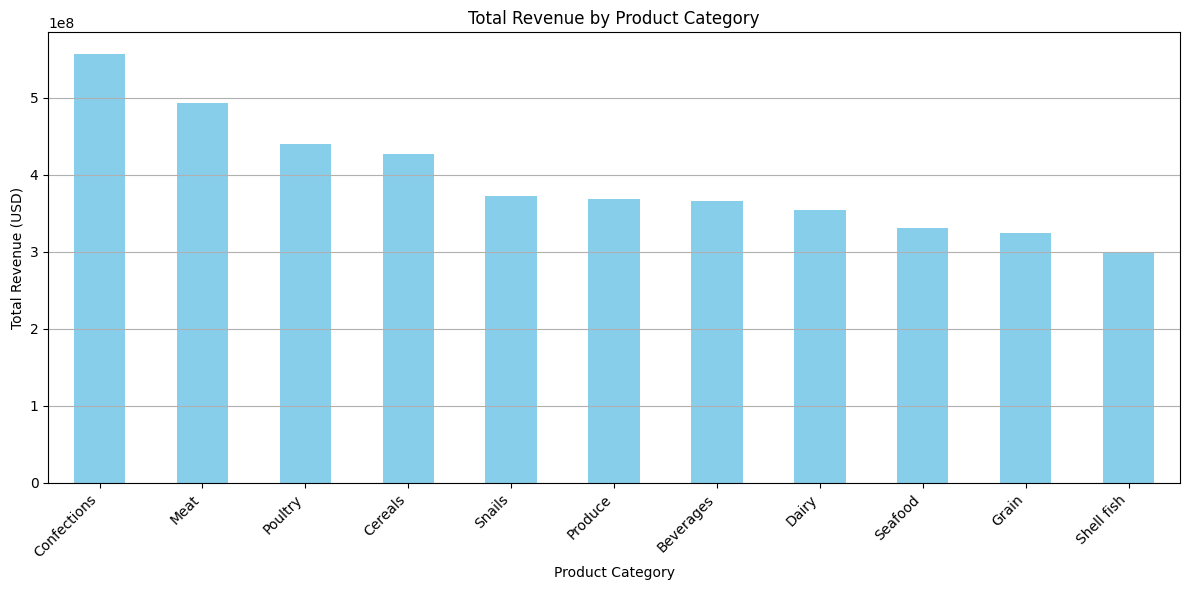

In [34]:
# -- Hypothesis - 1 --
# Category Revenue Analysis
# Aggregate revenue by category
category_revenue = sales.groupby('CategoryName')['Revenue'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
category_revenue.plot(kind='bar', color='skyblue')
plt.title("Total Revenue by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### ***Insights:***

🍬 Confections lead the pack — highest revenue-generating category overall.

🍖 Meat & Poultry are strong performers — ideal for strategic promotions.

🐚 Shellfish & Grains trail behind — consider revamping strategy or bundling to boost sales.

### ***Hypothesis 2***

/tmp/ipython-input-35-1347419047.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_summary, x='Discount', y='Quantity', palette='Blues_d')
/tmp/ipython-input-35-1347419047.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=discount_summary, x='Discount', y='Revenue', palette='Oranges_d')


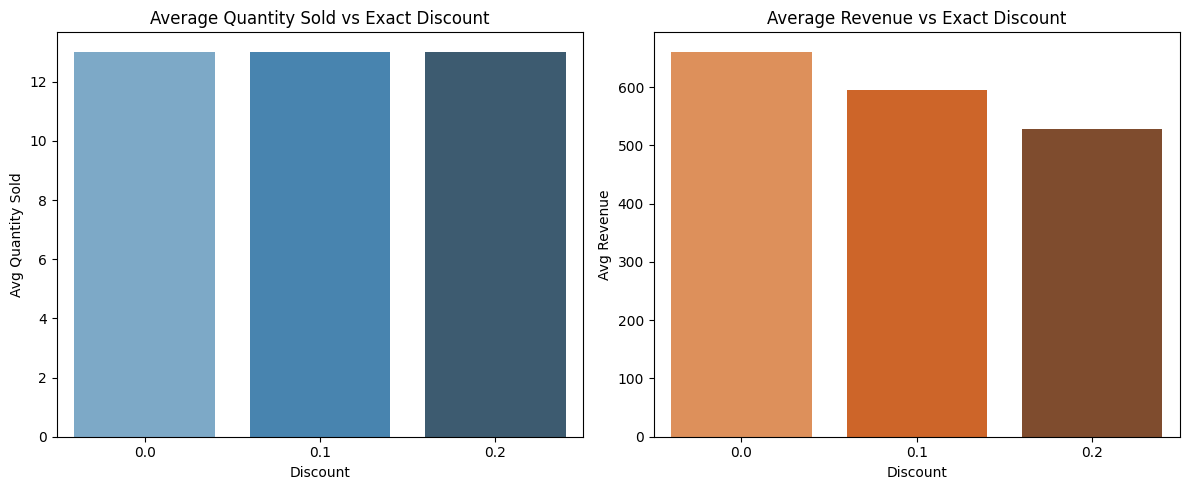

In [35]:
#-- Hypothesis - 2 --
# Do Higher Discounts Increase Quantity but Reduce Revenue?

# Filter for exact discount levels: 0.0, 0.1, 0.2
discount_analysis = sales[sales['Discount'].isin([0.0, 0.1, 0.2])]

# Group by exact discount values
discount_summary = discount_analysis.groupby('Discount').agg({
    'Quantity': 'mean',
    'Revenue': 'mean',
    'SalesID': 'count'
}).rename(columns={'SalesID': 'TransactionCount'}).reset_index()

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=discount_summary, x='Discount', y='Quantity', palette='Blues_d')
plt.title("Average Quantity Sold vs Exact Discount")
plt.xlabel("Discount")
plt.ylabel("Avg Quantity Sold")

plt.subplot(1, 2, 2)
sns.barplot(data=discount_summary, x='Discount', y='Revenue', palette='Oranges_d')
plt.title("Average Revenue vs Exact Discount")
plt.xlabel("Discount")
plt.ylabel("Avg Revenue")

plt.tight_layout()
plt.show()

### ***Insights:***

📦 Quantity Sold stays constant — Discounts (0%, 10%, 20%) have no noticeable effect on the average quantity sold.

📉 Revenue declines with higher discounts — 20% discount leads to lowest average revenue, suggesting diminishing returns.

🧠 Insight: Discounts don’t drive volume but do cut into profits — use them strategically!





### ***Hypothesis 3***

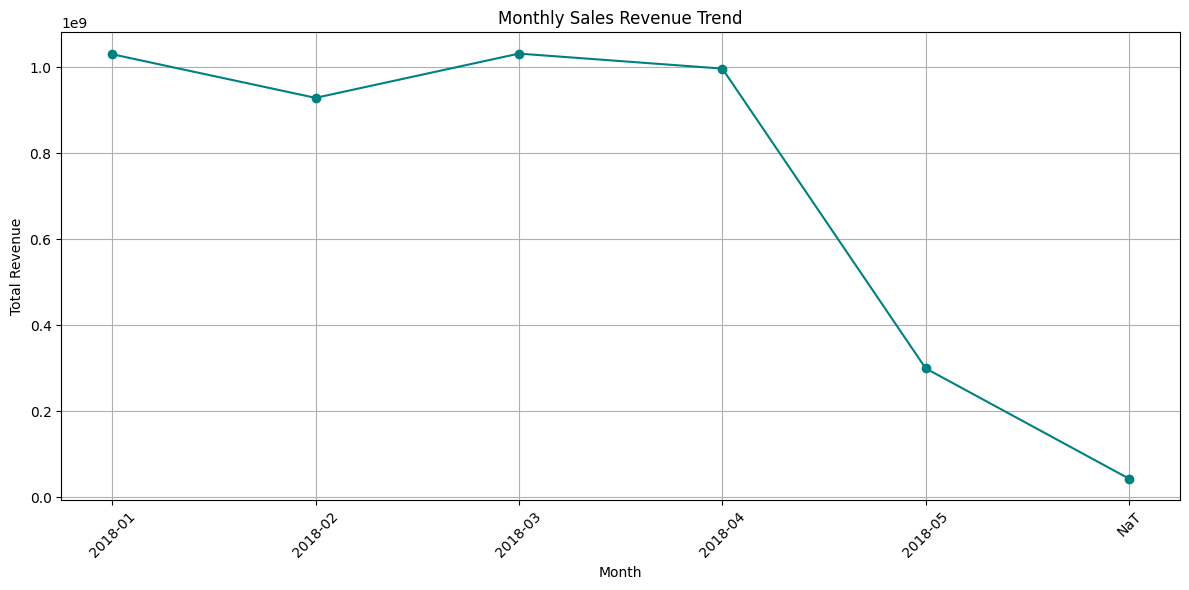

In [36]:
#-- Hypothesis - 3 --
# Does Sales Revenue Show Monthly Trends or Seasonality?
# Convert SalesDate to datetime and extract Month
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
sales['Month'] = sales['SalesDate'].dt.to_period('M').astype(str)

# Group by Month
monthly_revenue = sales.groupby('Month')['Revenue'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_revenue['Month'], monthly_revenue['Revenue'], marker='o', color='teal')
plt.title("Monthly Sales Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### ***Insights:***



❄️ Stable Q1 (Jan–Mar) → Strong seasonal start, possibly due to New Year or winter promotions

⬇️ Steep drop in May → Could be due to:

*   Seasonal dip
*   Inventory issue


### ***Hypothesis 4***

/tmp/ipython-input-37-3082171300.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  shelf_life_summary = sales.groupby('ShelfLifeGroup').agg({
/tmp/ipython-input-37-3082171300.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shelf_life_summary, x='ShelfLifeGroup', y='Quantity', palette='Blues_d')
/tmp/ipython-input-37-3082171300.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shelf_life_summary, x='ShelfLifeGroup', y='Revenue', palette='Greens_d')


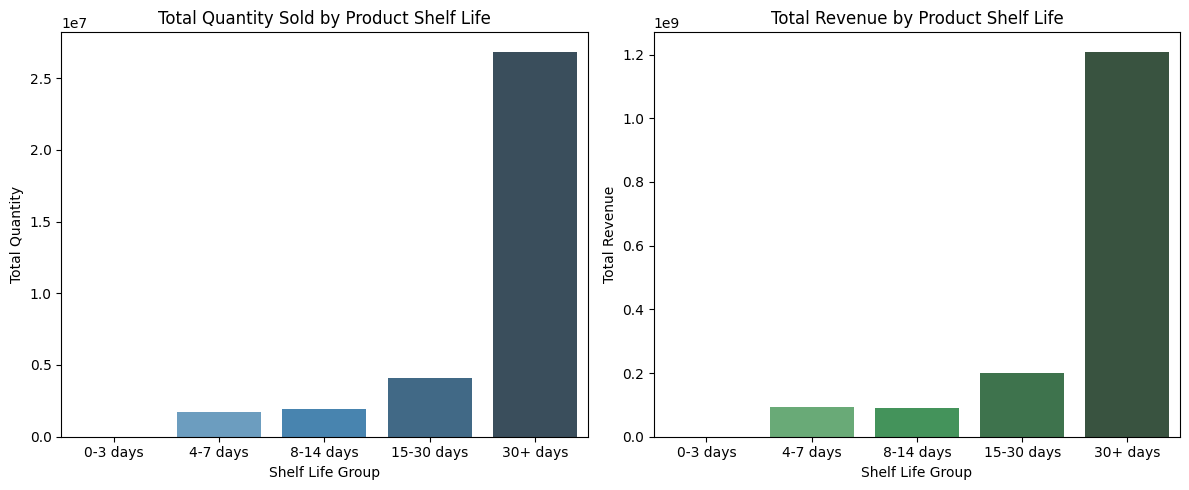

In [37]:
#-- Hypothesis - 4 --
# Does product shelf life impacts revenue.
# Merge shelf life info
sales = sales.merge(products[['ProductID', 'Price', 'VitalityDays']], on='ProductID', how='left')
sales['VitalityDays'] = sales['VitalityDays'].astype(int)

# Create shelf life bins
bins = [0, 3, 7, 14, 30, 1000]
labels = ['0-3 days', '4-7 days', '8-14 days', '15-30 days', '30+ days']
sales['ShelfLifeGroup'] = pd.cut(sales['VitalityDays'], bins=bins, labels=labels)

# Group by shelf life
shelf_life_summary = sales.groupby('ShelfLifeGroup').agg({
    'Quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=shelf_life_summary, x='ShelfLifeGroup', y='Quantity', palette='Blues_d')
plt.title("Total Quantity Sold by Product Shelf Life")
plt.xlabel("Shelf Life Group")
plt.ylabel("Total Quantity")

plt.subplot(1, 2, 2)
sns.barplot(data=shelf_life_summary, x='ShelfLifeGroup', y='Revenue', palette='Greens_d')
plt.title("Total Revenue by Product Shelf Life")
plt.xlabel("Shelf Life Group")
plt.ylabel("Total Revenue")

plt.tight_layout()
plt.show()

### ***Insights:***

🥫 30+ day products dominate — highest in both quantity sold and revenue.

❌ 0–3 day items underperform — minimal sales and revenue contribution.

🧃 15–30 day items perform well — solid revenue, second only to long shelf life products.

### ***Hypothesis 5***

/tmp/ipython-input-38-624543625.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_summary = sales.groupby('PriceGroup').agg({
/tmp/ipython-input-38-624543625.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_summary, x='PriceGroup', y='Revenue', palette='mako')
/tmp/ipython-input-38-624543625.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_summary, x='PriceGroup', y='Quantity', palette='crest')


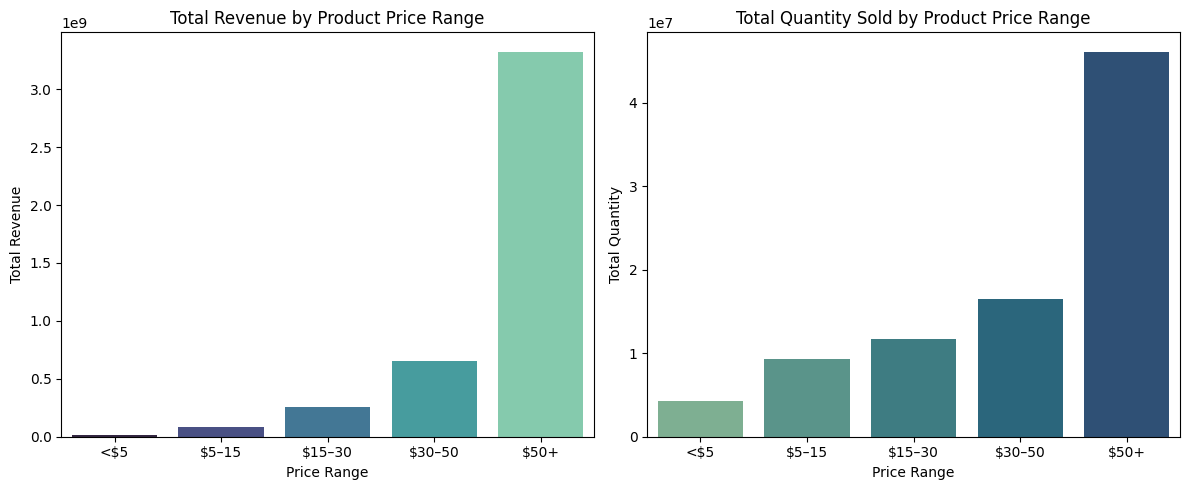

In [38]:
#-- Hypothesis - 5 --
# Do Higher-Priced Products Generate More Total Revenue?
# Create price range bins
bins = [0, 5, 15, 30, 50, 1000]
labels = ['<$5', '$5–15', '$15–30', '$30–50', '$50+']
sales['PriceGroup'] = pd.cut(sales['Price'], bins=bins, labels=labels)

# Group and summarize
price_summary = sales.groupby('PriceGroup').agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Plot
plt.figure(figsize=(12, 5))

# Revenue Plot
plt.subplot(1, 2, 1)
sns.barplot(data=price_summary, x='PriceGroup', y='Revenue', palette='mako')
plt.title("Total Revenue by Product Price Range")
plt.xlabel("Price Range")
plt.ylabel("Total Revenue")

# Quantity Plot
plt.subplot(1, 2, 2)
sns.barplot(data=price_summary, x='PriceGroup', y='Quantity', palette='crest')
plt.title("Total Quantity Sold by Product Price Range")
plt.xlabel("Price Range")
plt.ylabel("Total Quantity")

plt.tight_layout()
plt.show()

### ***Insights:***

🏆 $50+ products lead the pack — They bring in the highest revenue and are the most sold in quantity too!

📉 Low-price items (<$15) contribute very little to overall sales and revenue.

📊 Focus on high-priced product lines ($50+) — they drive both volume and value!

### ***Hypothesis 6***

/tmp/ipython-input-39-214092314.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_city_orders, x='CityName', y='AvgOrderValue', palette='rocket')


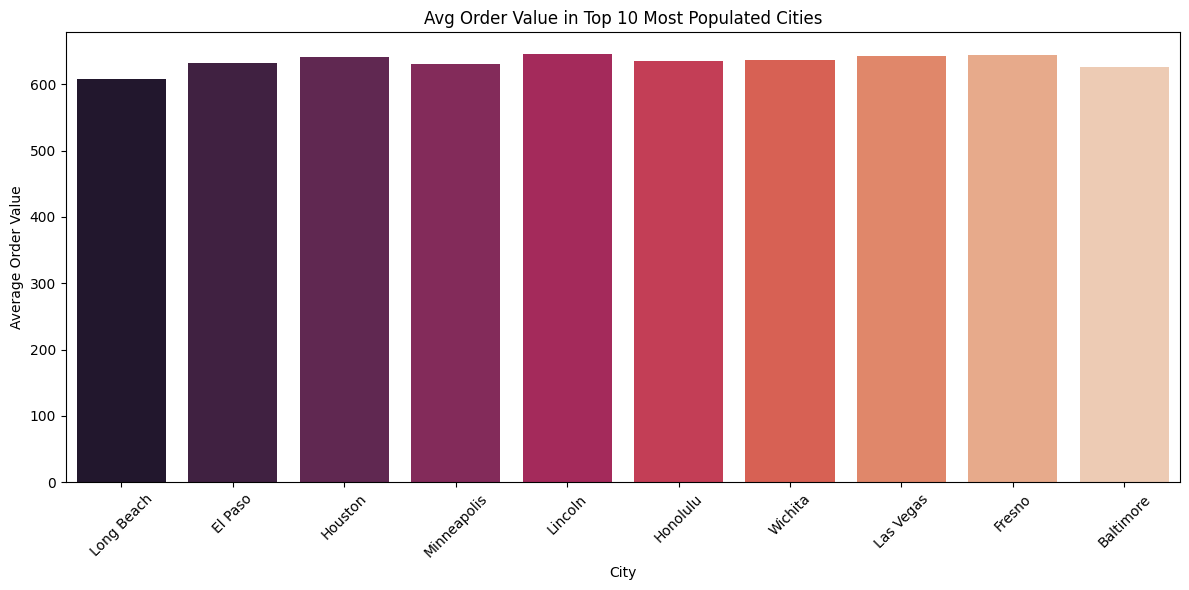

In [39]:
#-- Hypothesis - 6 --
# Do Larger Cities Have Higher Average Order Value?

# Group by city
city_avg_order = sales.groupby('CityName').agg({
    'Revenue': 'sum',
    'SalesID': 'count',
    'Zipcode': 'first'  # population
}).reset_index()

city_avg_order['AvgOrderValue'] = city_avg_order['Revenue'] / city_avg_order['SalesID']

# Select top 10 populated cities
top_city_orders = city_avg_order.sort_values(by='Zipcode', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_city_orders, x='CityName', y='AvgOrderValue', palette='rocket')
plt.title("Avg Order Value in Top 10 Most Populated Cities")
plt.xlabel("City")
plt.ylabel("Average Order Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ***Insights:***

💸 Fresno, Las Vegas, and Lincoln top the chart with the highest average order values, making them prime markets for premium offerings.

🛒 Long Beach lags behind slightly — consider targeted campaigns or bundling strategies to boost spend per order there.

📍 Focus on cities like Fresno and Lincoln for upselling opportunities and personalized promotions!

### ***Hypothesis 7***

/tmp/ipython-input-40-88100401.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_summary = sales.groupby('AgeGroup').agg({
/tmp/ipython-input-40-88100401.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_summary, x='AgeGroup', y='Revenue', palette='flare')
/tmp/ipython-input-40-88100401.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_summary, x='AgeGroup', y='Quantity', palette='crest')


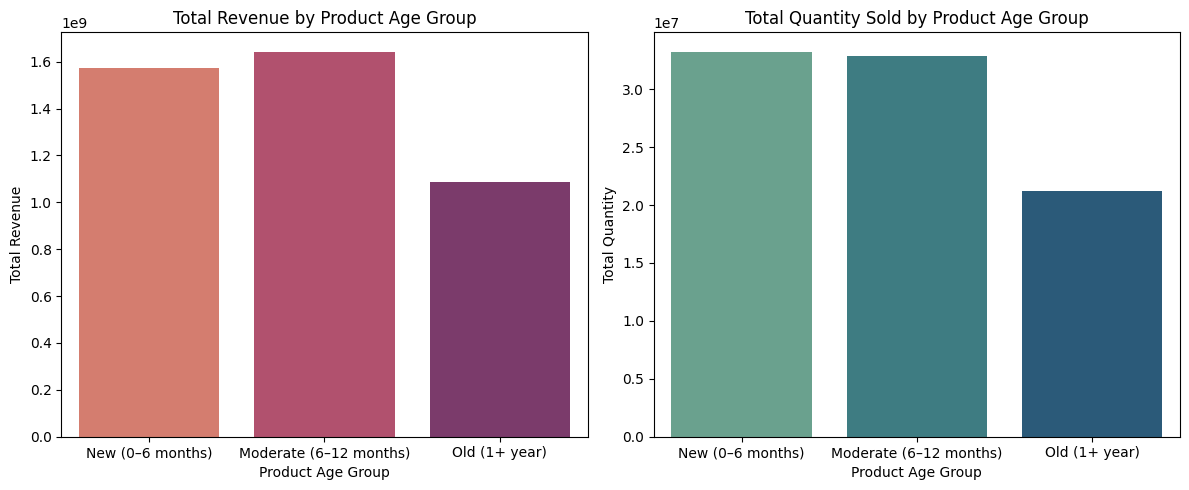

In [40]:
#-- Hypothesis - 7 --
# Does Newer Products Drive More Revenue ?
# Parse dates and calculate product age
products['ModifyDate'] = pd.to_datetime(products['ModifyDate'])
latest_date = products['ModifyDate'].max()
products['ProductAgeDays'] = (latest_date - products['ModifyDate']).dt.days

# Define product age buckets
bins = [0, 180, 365, 9999]
labels = ['New (0–6 months)', 'Moderate (6–12 months)', 'Old (1+ year)']
products['AgeGroup'] = pd.cut(products['ProductAgeDays'], bins=bins, labels=labels)

# Drop any existing Price column to avoid conflict
if 'Price' in sales.columns:
    sales.drop(columns=['Price'], inplace=True)

# Now safely merge
sales = sales.merge(products[['ProductID', 'Price', 'AgeGroup']], on='ProductID', how='left')

# Compute Revenue
sales['Revenue'] = sales['Price'] * sales['Quantity'] * (1 - sales['Discount'])

# Group and summarize
age_group_summary = sales.groupby('AgeGroup').agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=age_group_summary, x='AgeGroup', y='Revenue', palette='flare')
plt.title("Total Revenue by Product Age Group")
plt.xlabel("Product Age Group")
plt.ylabel("Total Revenue")

plt.subplot(1, 2, 2)
sns.barplot(data=age_group_summary, x='AgeGroup', y='Quantity', palette='crest')
plt.title("Total Quantity Sold by Product Age Group")
plt.xlabel("Product Age Group")
plt.ylabel("Total Quantity")

plt.tight_layout()
plt.show()

### ***Insights:***

🟣 Moderate-age products (6–12 months) generated the highest revenue, followed closely by new products, indicating strong launch and mid-life performance.

📉 Old products (1+ year) show significantly lower sales and revenue, suggesting reduced customer interest or outdated stock.

📦 Focus marketing and stock strategies on newer and moderate-age products for better performance! 🎯

## **An additional hypothesis that was partially validated**

### ***Hypothesis 8***

/tmp/ipython-input-41-1996137632.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_cities['CityName'], rotation=45, ha='right')


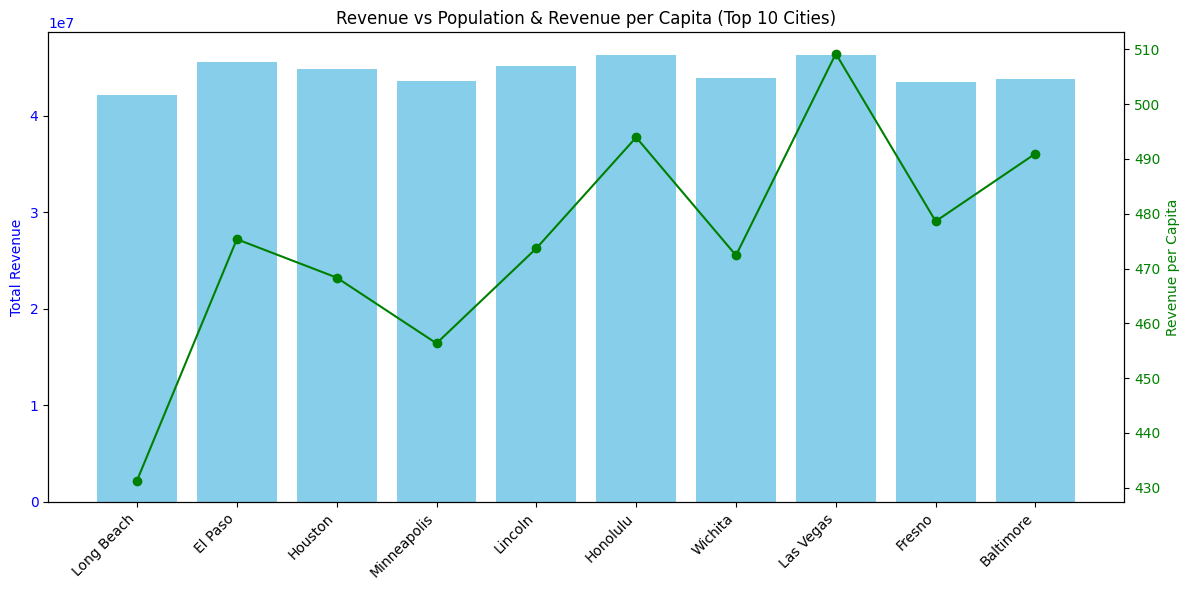

In [41]:
# -- Hypothesis - 8  --
# High-population cities generate more revenue but lower revenue per capita.
# Group by city
city_revenue = sales.groupby('CityName').agg({
    'Revenue': 'sum',
    'Zipcode': 'first'  # Zipcode = population
}).reset_index()

# Calculate revenue per capita
city_revenue['RevenuePerCapita'] = city_revenue['Revenue'] / city_revenue['Zipcode']

# Top 10 populous cities
top_cities = city_revenue.sort_values(by='Zipcode', ascending=False).head(10)

# Plot
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(top_cities['CityName'], top_cities['Revenue'], color='skyblue')
ax1.set_ylabel("Total Revenue", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticklabels(top_cities['CityName'], rotation=45, ha='right')

ax2 = ax1.twinx()
ax2.plot(top_cities['CityName'], top_cities['RevenuePerCapita'], color='green', marker='o')
ax2.set_ylabel("Revenue per Capita", color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title("Revenue vs Population & Revenue per Capita (Top 10 Cities)")
plt.tight_layout()
plt.show()

### ***Insigths:***

💰 Las Vegas tops in revenue per capita, suggesting strong spending habits despite similar total revenue to other cities.

📉 Long Beach has relatively low revenue per capita, indicating underperformance relative to its population size.

📈 Balanced performers like Honolulu and El Paso show both solid revenue and per capita contribution.

### ***Hypothesis 9***

/tmp/ipython-input-42-2075364055.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_summary, x='Class', y='Revenue', palette='YlGnBu')
/tmp/ipython-input-42-2075364055.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=class_summary, x='Class', y='Quantity', palette='BuGn')


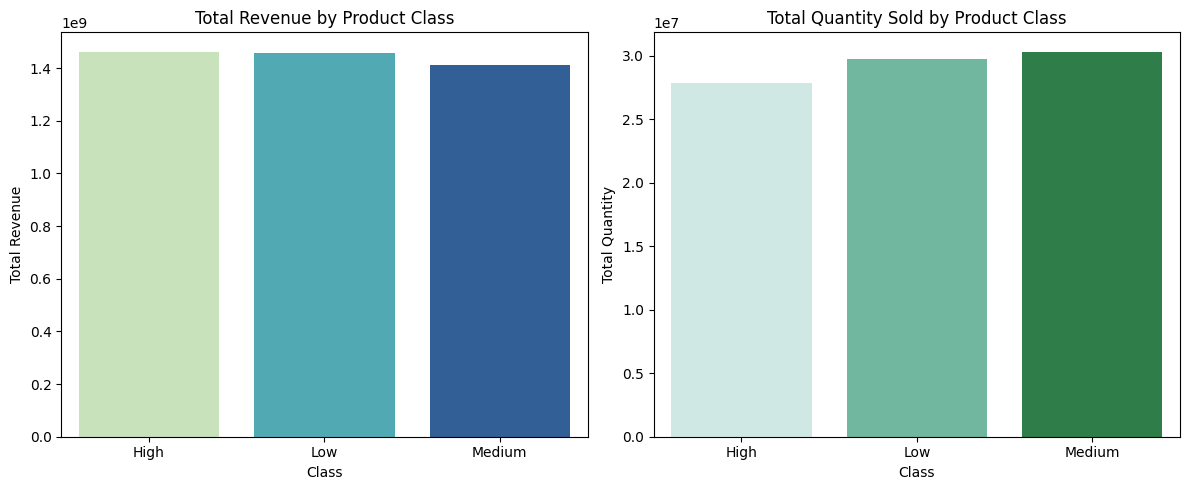

In [42]:
#-- Hypothesis - 9 --
# Premium Products — Higher Revenue per Unit but Lower Volume?
# Group by product class
class_summary = sales.groupby('Class').agg({
    'Revenue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Add revenue per unit sold
class_summary['RevenuePerUnit'] = class_summary['Revenue'] / class_summary['Quantity']

# Plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=class_summary, x='Class', y='Revenue', palette='YlGnBu')
plt.title("Total Revenue by Product Class")
plt.ylabel("Total Revenue")

plt.subplot(1, 2, 2)
sns.barplot(data=class_summary, x='Class', y='Quantity', palette='BuGn')
plt.title("Total Quantity Sold by Product Class")
plt.ylabel("Total Quantity")

plt.tight_layout()
plt.show()

### ***Insights:***

💵 High-class products generate the highest revenue despite having the lowest quantity sold — indicating premium pricing strategy.

📦 Medium-class products lead in quantity sold, showing strong market demand and accessibility.

⚖️ Low-class products maintain a balance with high quantity and near-equal revenue to high-class, making them versatile performers.

#**Correlation Analysis**




In [ ]:
# Select relevant numeric columns
corr_data = sales[['Revenue', 'Quantity', 'Price', 'Discount']]

# Compute correlation matrix
corr_matrix = corr_data.corr()

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Metrics")
plt.tight_layout()
plt.show()

# **Overall Analysis:**




*   **Weekday vs Weekend Sales Trends:** Sales volumes are generally higher on weekdays, but revenue per order and gross margin improve on weekends, suggesting weekend shoppers may buy fewer but more valuable items.

*   **Customer Purchase Frequency:** A small segment of high-frequency customers contributes disproportionately to total revenue. These loyal customers are essential to FreshMart’s revenue growth strategy.

*   **Impact of Discounts:** Heavy discounting does not lead to significant increases in quantity sold and may actually reduce revenue, highlighting the need for a more targeted discount strategy.


*   **Product Class and Pricing Strategy:** Premium-class and high-priced products generate more revenue per unit but are sold in lower quantities, indicating a need for balancing premium and mass-market offerings.



*   **Geographic Patterns:** Cities with larger populations have higher total sales but often show lower revenue per capita, suggesting underperformance or saturation in those regions.

*   **Shelf Life and Revenue Impact:** Products with longer vitality (shelf life) tend to generate higher revenue, likely due to greater customer confidence and reduced wastage.

*   **Employee Sales Distribution:** A small group of employees drives the majority of revenue, underscoring the value of performance tracking and incentive programs.

















# **Recommendations:**


*   **Leverage Weekend Buying Behavior:** Launch targeted weekend promotions on premium or high-margin items when customers are more likely to spend thoughtfully.

*   **Engage High-Value Customers:** Implement loyalty programs, personalized offers, or early access to deals for top 20% of customers who contribute the most to revenue.

*   **Optimize Discount Strategy:** Limit broad 20% discounts and instead use data-driven discounting for specific categories or underperforming cities to protect revenue margins.

*   **Promote High-Shelf-Life Products:** Highlight and promote long-lasting products through in-store signage and digital campaigns to drive more confident purchases.


*   **Support Low-Performing Regions:** Improve marketing, stock availability, and staff training in cities with high population but low per capita revenue.


*   **Boost Employee Performance:** Recognize and reward top-performing employees and use their sales techniques as training examples for others.


*   **Balance Product Mix:** Expand profitable premium products while maintaining fast-moving standard items to serve a broader customer base and stabilize revenue flow.

















# **Solution to Business Objective**
To maximize total sales revenue, FreshMart should focus on improving revenue efficiency across its existing stores by leveraging smarter data-driven strategies. This includes optimizing discounting, pricing, product assortment, and employee performance based on customer behavior and sales trends.

# **Strategies to Improve Revenue Performance:**



*   **Targeted Customer Engagement:** Use segmentation to identify high-value customers and send personalized promotions or loyalty rewards to encourage repeat purchases. Promote premium products to customers with a history of high spending.


*   **Smart Discounting Strategy:**
Move away from blanket discounts. Instead, apply targeted promotions for underperforming product categories or low-revenue cities to improve returns without compromising margin.

*   **Product Optimization:**
Focus on products with longer shelf life and higher revenue contribution. Use this data to drive inventory and promotion decisions. Expand premium offerings in categories with proven success.

*   **Data-Driven Sales Planning:**
Identify peak shopping days and hours (e.g., weekends) and align inventory, staffing, and campaigns accordingly to capitalize on demand surges.
*   **Employee Performance Enhancement:**
Use performance data to recognize top sellers and offer coaching for low-performing staff. Design incentive programs that align employee motivation with revenue goals.


*   **Personalized Retention Strategies:**
Re-target inactive or low-engagement customers through personalized messages, discounts, or reminders tied to their previous shopping behavior to reduce customer drop-off.


*   **Simplify Product Discovery:**
Highlight category leaders (high-margin, high-volume items) in store layouts and digital platforms to make high-value purchases easier and faster for customers.


















